# MAT1856/APM466 Assignment 1

**Author:** Chenxi Liu, **Student #:** 1010615050


## Data Cleaning

In [1]:
import pandas as pd

# Specify file paths
file_path_info = "/Users/dawn/Desktop/uoft/sta1856/bond info.xlsx"
file_path_price = "/Users/dawn/Desktop/uoft/sta1856/bond price.xlsx"

# Read Excel files into dataframes
bond_info = pd.read_excel(file_path_info)
bond_price = pd.read_excel(file_path_price)

# Clean column names
bond_info.columns = bond_info.columns.str.lower().str.replace(" ", "_")
bond_price.columns = bond_price.columns.str.lower().str.replace(" ", "_")

# Convert YIELD column to numeric
bond_info['yield'] = pd.to_numeric(bond_info['yield'], errors='coerce')

# Convert date columns to datetime
bond_info['issue_date'] = pd.to_datetime(bond_info['issue_date'])
bond_info['maturity_date'] = pd.to_datetime(bond_info['maturity_date'])
bond_price['date'] = pd.to_datetime(bond_price['date'])

# Select relevant columns from bond_price dataframe
bond_price = bond_price[['date', 'isin', 'close']]

# Question

## 2.1 Fundamental Questions

###  1.(a) Why do governments issue bonds and not simply print more money?

Governments issue bonds instead of simply printing more money to avoid inflation and economic instability. Printing money can lead to an increase in the money supply, which may cause inflation and a rise in prices. On the other hand, issuing bonds is a way for the government to raise funds, attracting investors to purchase bonds to support government spending and projects. Additionally, issuing bonds can build trust between the government and investors, improve the country's credit rating, and reduce borrowing costs. 

###  1.(b) Give a hypothetical example of why the long-term part of a yield curve might flatten.

The long-term part of a yield curve might flatten in a hypothetical scenario where investors have expectations of lower inflation and slower economic growth in the future. This could lead to decreased demand for long-term bonds, causing their prices to fall and their yields to rise.  

###  1.(c) Explain what quantitative easing is and how the (US) Fed has employed this since the beginning of the COVID-19 pandemic.

Quantitative easing is a form of monetary policy in which a central bank purchases securities to lower interest rates and increase the money supply. It is typically used when interest rates are near zero and economic growth is stalled, as in the COVID-19 pandemic. QE involves the central bank purchasing predetermined amounts of government bonds or other financial assets to stimulate economic activity and increase the money supply.

Since the beginning of the COVID-19 pandemic, the U.S. Federal Reserve (the Fed) has employed quantitative easing as part of its strategy to support the economy:

The Fed resumed purchasing massive amounts of debt securities, a key tool it had previously employed during the Great Recession. 
Supporting Various Markets: The Fed also supported corporate bonds, municipal bonds, and even certain types of asset-backed securities.
Increasing the Balance Sheet: The Fed's balance sheet increased significantly as a result of these purchases. This expansion was meant to address the economic fallout caused by the COVID-19 pandemic, as well as to ensure that banks had enough liquidity to continue lending.
Fiscal Support: In addition to QE, Congress passed legislation providing fiscal support totaling nearly $5.8 trillion, about 28 percent of U.S. GDP, which worked in conjunction with the Fed's monetary policy actions to mitigate the economic impact of the pandemic.

### 2

Based on the provided bond information, Here are the 10 selected bonds and the reasons for their selection:

1. CAN 2.75 Aug 24 : This bond has a short-term maturity and a relatively high coupon, suitable for the short end of the curve.
2. CAN 3.75 Feb 25: This bond has a slightly higher coupon and a short-term maturity, providing a comparison with the first bond.
3. CAN 1.5 Jun 26: A medium-term maturity bond with a moderate coupon and an earlier issue date.
4. CAN 1.0 Sep 26: Another medium-term maturity  bond with a slightly lower coupon and a later issue date, capturing yield changes over time.
5. CAN 1.25 Mar 27: A medium-term bond with a moderate coupon, providing additional data points.
6. CAN 3.25 Aug 27: Medium-term bond with a higher coupon and an later issue date, useful for the middle end of the curve.
7. CAN 2.0 Jun 28: Medium-term bond with a higher coupon and a earlier issue date, offering a comparison with the previous medium-term bond.
8. CAN 3.5 Mar 28: Medium-term bond with a relatively higher coupon and a later issue date, contributing to the middle end of the curve.
9. CAN 2.25 Dec 29: Long-term bond with a moderate coupon and a later issue date, providing additional data for the long end of the curve.
10. CAN 5.75 Jun 29: Long-term bond with a highest coupon and an very old issue date, adding to the long end of the curve.

### 3

In general, if we have several stochastic processes representing unique points along a stochastic curve, the eigenvalues and eigenvectors associated with the covariance matrix of those processes tell us about the variability and direction of the data. The eigenvalues represent the amount of variance captured by each principal component, while the eigenvectors indicate the direction in which the data varies the most. This information helps us identify the most significant patterns and trends in the data, allowing us to reduce the dimensionality of the data and identify the most important factors driving the variability in the stochastic processes. 


## 2.2 Empirica Questions

### 4.(a)

In [2]:
# Merge bond_info and bond_price based on 'isin'
merged_data = pd.merge(bond_price, bond_info, on='isin')

# Convert date columns to datetime
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['maturity_date'] = pd.to_datetime(merged_data['maturity_date'])
merged_data['issue_date'] = pd.to_datetime(merged_data['issue_date'])

# Calculate days_to_maturity and years_to_maturity
merged_data['days_to_maturity'] = (merged_data['maturity_date'] - merged_data['date']).dt.days
merged_data['years_to_maturity'] = merged_data['days_to_maturity'] / 365

# Filter bond_10 for desired ISINs and date
bond_10 = merged_data.loc[(merged_data['isin'].isin(["CA135087E679", "CA135087L930", "CA135087P733", "CA135087N910", "CA135087WL43", 
           "CA135087H235", "CA135087P659", "CA135087P576", "CA135087M847","CA135087N670"]))]

bond_10['coupon'] = bond_10['coupon']*100
print(bond_10.head(5))

        date          isin    close currency  coupon   yield moody's_rating  \
0 2023-01-20  CA135087E679  0.95000      CAD     1.5  0.0397            Aaa   
1 2023-01-19  CA135087E679  0.95345      CAD     1.5  0.0397            Aaa   
2 2023-01-18  CA135087E679  0.95335      CAD     1.5  0.0397            Aaa   
3 2023-01-17  CA135087E679  0.94960      CAD     1.5  0.0397            Aaa   
4 2023-01-16  CA135087E679  0.94890      CAD     1.5  0.0397            Aaa   

  maturity_date    bid    ask issue_date  days_to_maturity  years_to_maturity  
0    2026-06-01  94.39  94.82 2015-07-21              1228           3.364384  
1    2026-06-01  94.39  94.82 2015-07-21              1229           3.367123  
2    2026-06-01  94.39  94.82 2015-07-21              1230           3.369863  
3    2026-06-01  94.39  94.82 2015-07-21              1231           3.372603  
4    2026-06-01  94.39  94.82 2015-07-21              1232           3.375342  


/var/folders/3k/f2ynl7cs6s12709sxn16t2vc0000gn/T/ipykernel_92628/246571705.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bond_10['coupon'] = bond_10['coupon']*100


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.interpolate import interp1d

# Function to calculate the yield to maturity (YTM)
def calculate_ytm(price, face_value, coupon_rate, years_to_maturity, payments_per_year=2):
    """
    Calculate the yield to maturity of a bond.

    :param price: Current price of the bond
    :param face_value: Face value of the bond
    :param coupon_rate: Annual coupon rate in percent
    :param years_to_maturity: Years until bond matures
    :param payments_per_year: Number of coupon payments per year
    :return: Yield to maturity as a decimal
    """
    coupon = face_value * (coupon_rate / 100) / payments_per_year
    periods = years_to_maturity * payments_per_year

    def ytm_function(ytm):
        return sum([coupon / ((1 + ytm/payments_per_year) ** t) for t in range(1, int(periods) + 1)]) + \
               face_value / ((1 + ytm/payments_per_year) ** periods) - price

    return brentq(ytm_function, a=-1, b=1)


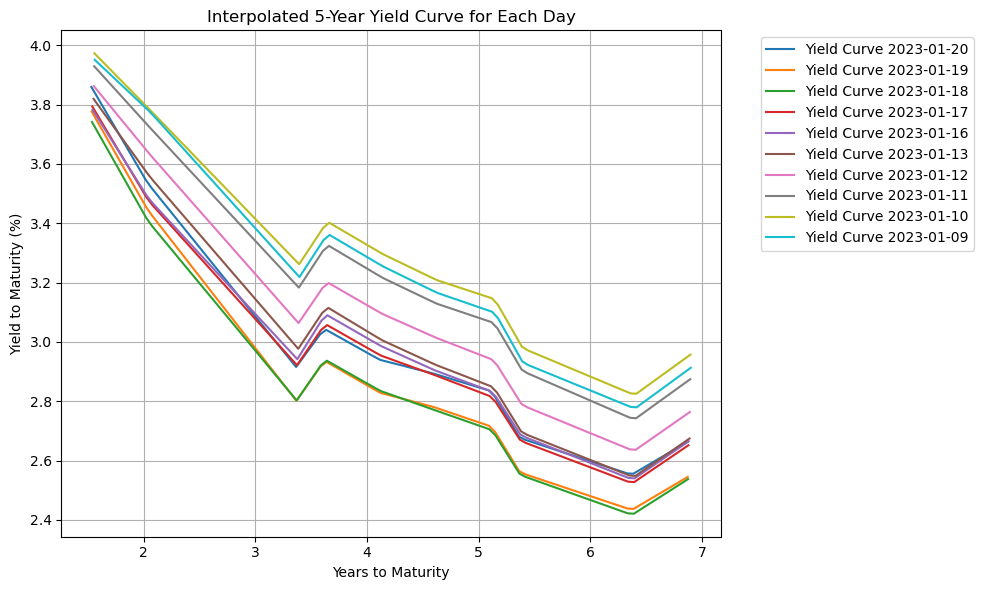

In [4]:
# Assuming a face value of 100 for all bonds
face_value = 100

# Unique dates in the dataset
unique_dates = bond_10['date'].unique()
collected_yield = []

# Plot setup
plt.figure(figsize=(10, 6))

# Iterate over each unique date
for date in unique_dates:
    # Filter bonds data for the current date
    bonds_data_date = bond_10[bond_10['date'] == date].to_dict(orient='records')
    
    ytms = []
    for bond in bonds_data_date:
        ytm = calculate_ytm(bond["close"] * face_value, face_value, bond["coupon"], bond["years_to_maturity"])
        ytms.append(ytm)
        # Store each bond's data in the list
        collected_yield.append({
            'date': date,
            'yield_rate': ytm,
            'years_to_maturity': bond["years_to_maturity"]
        })
    
        # Calculate YTM for each bond on this date
    ytms = [calculate_ytm(bond["close"] * face_value, face_value, bond["coupon"], bond["years_to_maturity"]) for bond in bonds_data_date]
    
    # Get years to maturity for sorting
    years_to_maturity = [bond["years_to_maturity"] for bond in bonds_data_date]
    
    
    # Sort YTMs and years to maturity for plotting
    sorted_indices = np.argsort(years_to_maturity)
    sorted_ytms = np.array(ytms)[sorted_indices]
    sorted_years_to_maturity = np.array(years_to_maturity)[sorted_indices]
    
    # Interpolating YTM for a smooth yield curve
    interpolated_ytm = interp1d(sorted_years_to_maturity, sorted_ytms, kind='linear', fill_value="extrapolate")
    
    # Generating points for the curve
    x_points = np.linspace(min(sorted_years_to_maturity), max(sorted_years_to_maturity), 100)
    y_points = interpolated_ytm(x_points)
    
    # Plotting the yield curve for the current date
    plt.plot(x_points, y_points * 100, label=f'Yield Curve {pd.to_datetime(date).date()}')

# Finalizing the plot
plt.title('Interpolated 5-Year Yield Curve for Each Day')
plt.xlabel('Years to Maturity')
plt.ylabel('Yield to Maturity (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position to avoid overlap
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


In [5]:
collected_yield = pd.DataFrame(collected_yield)

### 4.(b)

#### Pseudo-Code for Deriving the Spot Curve:
1. Preparation:Collect bond data, including prices, coupon rates, maturities, and payment frequencies.
2. For Each Bond: Calculate the cash flows, including coupon payments and the face value at maturity.
3. Bootstrapping the Spot Rates: 
* Start with the bond having the shortest maturity to find the 1-year spot rate. For a bond maturing in 1 year, the spot rate can be directly calculated since it will only have one cash flow (the face value plus the last coupon). Use the formula: spot rate = ((face value + coupon payment)/price)^(1/ytm)-1
* For bonds with maturities greater than 1 year, use the previously calculated spot rates to find the present value of cash flows occurring before the bond's maturity. Subtract these from the bond's price to isolate the final cash flow. Solve for the spot rate that equates this discounted cash flow to the isolated final cash flow.
* Repeat this bootstrapping process, moving from bonds with the shortest maturity to those with longer maturities, to derive spot rates for 2, 3, 4, and 5 years.
4. Constructing the Spot Curve: With spot rates for 1 through 5 years calculated, plot these rates against their corresponding maturities.
5. Plotting the Spot Curve

In [6]:
from scipy.optimize import newton

# Define the function to calculate the price of the bond given a spot rate
def price_equation(spot_rate, face_value, price, coupon, years_to_maturity):
    # For simplicity, assuming the bond pays a single coupon at maturity (like a zero-coupon bond)
    # Adjust this formula based on your actual bond's coupon payment structure
    return coupon / ((1 + spot_rate) ** years_to_maturity) + face_value / ((1 + spot_rate) ** years_to_maturity) - price


# Initial guess for spot rate
initial_guess = 0.05


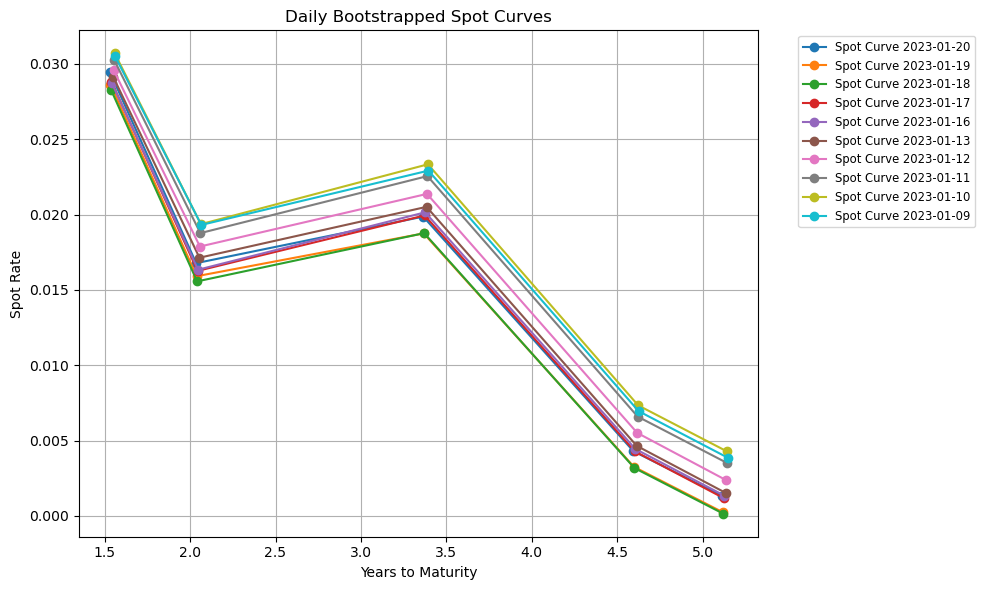

In [7]:
bond_5 = bond_10.loc[bond_10['isin'].isin(['CA135087N910','CA135087P659','CA135087E679','CA135087P733','CA135087P576'])]

# Assuming price_equation, initial_guess, and bond_5 are defined as before

plt.figure(figsize=(10, 6))
collected_data = []

for date in unique_dates:
    bonds_date = bond_5[bond_5['date'] == date]
    spot_rates_for_date = []  # Collect spot rates for this date
    years_to_maturity_for_date = []  # Collect years to maturity for this date

    for index, row in bonds_date.iterrows():
        face_value = 100  # Assuming a face value of 100 for all bonds
        price = row['close'] * 100  # Convert close price to full price
        coupon = row['coupon'] * face_value / 100  # Convert coupon rate to coupon payment
        years_to_maturity = row['years_to_maturity']
        
        # Solve for the spot rate using the Newton-Raphson method
        try:
            spot_rate = newton(price_equation, initial_guess, args=(face_value, price, coupon, years_to_maturity))
        except RuntimeError as e:
            print(f"Newton-Raphson method failed to converge for ISIN {row['isin']} on {date}.")
            spot_rate = None

        if spot_rate is not None:
            collected_data.append({
                'date': date,
                'isin': row['isin'],
                'spot_rate': spot_rate,
                'years_to_maturity': years_to_maturity
            })
            spot_rates_for_date.append(spot_rate)
            years_to_maturity_for_date.append(years_to_maturity)

    # Ensure data is sorted by years to maturity for this date
    if years_to_maturity_for_date:
        sorted_indices = sorted(range(len(years_to_maturity_for_date)), key=lambda i: years_to_maturity_for_date[i])
        sorted_spot_rates = [spot_rates_for_date[i] for i in sorted_indices]
        sorted_years_to_maturity = [years_to_maturity_for_date[i] for i in sorted_indices]
        
        # Plot the sorted spot rates for this date
        plt.plot(sorted_years_to_maturity, sorted_spot_rates, '-o', label=f'Spot Curve {pd.to_datetime(date).date()}')

plt.title('Daily Bootstrapped Spot Curves')
plt.xlabel('Years to Maturity')
plt.ylabel('Spot Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# Convert the collected data into a DataFrame
spot_rate_dataset = pd.DataFrame(collected_data)

### 4.(c)

#### Pseudo-Code for Deriving the e 1-year Forward Curve:
1. Calculate or Obtain Spot Rates: Use a bootstrapping method to calculate the spot rates for each year.
2. Derive Forward Rates from Spot Rates: For each forward rate from year n to year n+1 (where n ranges from 2 to 5), apply the following formula to derive the forward rate based on the spot rates:
$$(1 + F_{n,n+1}) = \frac{(1+S_{n+1})^{n+1}}{(1+S_n)^n}$$
* $F_{n,n+1}$ is the forward rate from year n to year n+1 
* $S_n$ and $S_{n+1}$ are the spot rates for years n and years n+1 respectively
3. Calculate Forward Rates
* For each term from 2 to 5 years:Calculate the forward rate using the formula above.
* Store the calculated forward rate.
4. Store and Plot the Forward Curve
* Process: Collect all the calculated 1-year forward rates for terms 2 to 5 years.
* Plot: Use a plotting library (e.g., matplotlib) to plot the forward curve, with the x-axis representing the term (2 to 5 years) and the y-axis representing the forward rate.

In [9]:
# Function to calculate forward rates from spot rates
def calculate_forward_rates(spot_rates):
    """
    Calculate the annualized forward rates from an array of spot rates.
    
    :param spot_rates: An array of spot rates, where the index represents the time to maturity.
                       For example, spot_rates[1] is the 1-year spot rate, spot_rates[2] is the 2-year spot rate, etc.
    :return: An array of forward rates, where the index represents the start time of the forward rate.
             For example, forward_rates[0] is the forward rate from year 1 to year 2.
    """
    forward_rates = np.zeros(len(spot_rates) - 1)
    for i in range(len(spot_rates) - 1):
        S_t1 = spot_rates[i]
        S_t2 = spot_rates[i + 1]
        t1 = i + 1
        t2 = i + 2
        F_t1_t2 = ((1 + S_t2)**t2 / (1 + S_t1)**t1)**(1 / (t2 - t1)) - 1
        forward_rates[i] = F_t1_t2
        
    return forward_rates

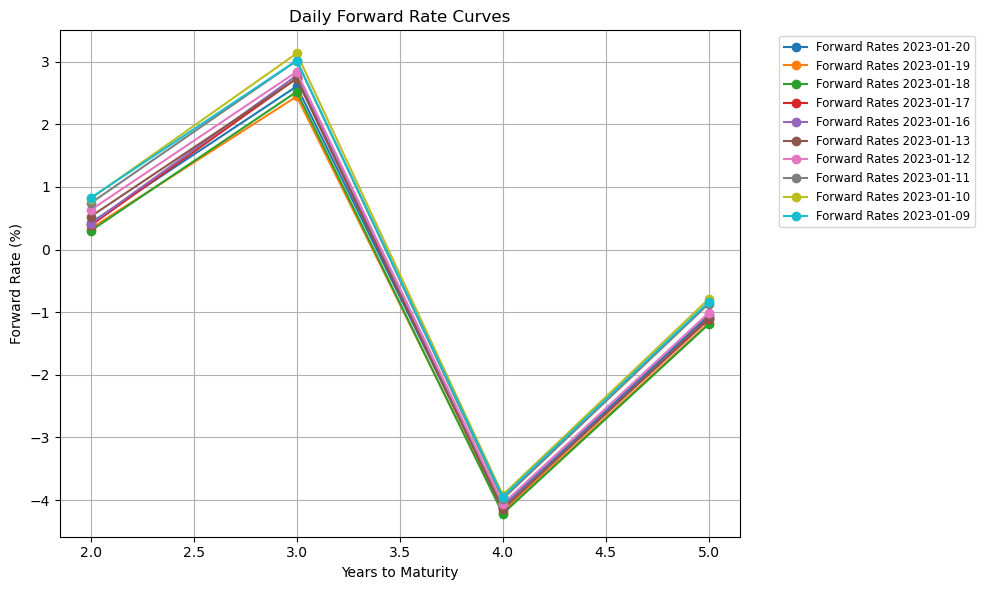

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Initialize figure for plotting
plt.figure(figsize=(10, 6))
collect_forward = []

for date in unique_dates:
    current_date_data = spot_rate_dataset[spot_rate_dataset['date'] == date]
    current_date_data_sorted = current_date_data.sort_values(by='years_to_maturity')
    
    spot_rates = current_date_data_sorted['spot_rate'].values
    isins = current_date_data_sorted['isin'].values  # Collect ISINs for reference
    
    forward_rates = calculate_forward_rates(spot_rates)
    
    # Collect data for each forward rate
    for i, forward_rate in enumerate(forward_rates):
        collect_forward.append({
            'date': date,
            'forward_rate': forward_rate,
            'years_to_maturity_start': i + 1,
            'years_to_maturity_end': i + 2,
            'isin_start': isins[i],  # ISIN at the start of the period
            'isin_end': isins[i + 1],  # ISIN at the end of the period
        })
        
    years = np.arange(2, len(forward_rates) + 2)
    plt.plot(years, forward_rates * 100, '-o', label=f'Forward Rates {pd.to_datetime(date).date()}')

plt.title('Daily Forward Rate Curves')
plt.xlabel('Years to Maturity')
plt.ylabel('Forward Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()



### 5 Yields rate cov

In [11]:
merged_yield = pd.merge(collected_yield, bond_10, on='years_to_maturity')
merged_yield = merged_yield.drop(columns=['date_y'])

# Rename 'date_x' to 'date'
merged_yield = merged_yield.rename(columns={'date_x': 'date'})
merged_yield['date'] = pd.to_datetime(merged_yield['date'])
# Filter bond_10 for desired ISINs and date
merged_yield = merged_yield.loc[(merged_yield['isin'].isin(['CA135087N910','CA135087P659','CA135087E679','CA135087P733','CA135087P576']))]

In [12]:
def calculate_log_returns(group):
    # Ensure the data is sorted by date
    group = group.sort_values(by='date')
    
    # Calculate log returns
    log_returns = np.log(group['yield_rate'].pct_change() + 1)
    
    # Replace infinite values with NaN and drop them
    log_returns = log_returns.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Extract the ISIN from the group (it's constant for each group)
    isin = group['isin'].iloc[0]
    
    # Return a DataFrame including the date, ISIN, and log returns
    return pd.DataFrame({
        'date': group['date'],
        'isin': isin,
        'log_return': log_returns
    })


In [13]:
# Apply the modified function
log_returns_by_bond_with_date = merged_yield.groupby('isin', as_index=False).apply(calculate_log_returns).reset_index(drop=True)
log_returns_by_bond_with_date.dropna(inplace = True)

/var/folders/3k/f2ynl7cs6s12709sxn16t2vc0000gn/T/ipykernel_92628/1316183151.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  log_returns_by_bond_with_date = merged_yield.groupby('isin', as_index=False).apply(calculate_log_returns).reset_index(drop=True)


In [14]:
# Now pivot the DataFrame so each column represents a bond's log returns and each row represents a date or sequence
log_returns_pivot = log_returns_by_bond_with_date.pivot(index='date', columns='isin', values='log_return')

# Calculate the covariance matrix
cov_matrix = log_returns_pivot.cov()

print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
isin          CA135087E679  CA135087N910  CA135087P576  CA135087P659  \
isin                                                                   
CA135087E679      0.000686      0.000325      0.000733      0.000421   
CA135087N910      0.000325      0.000171      0.000347      0.000228   
CA135087P576      0.000733      0.000347      0.000792      0.000449   
CA135087P659      0.000421      0.000228      0.000449      0.000311   
CA135087P733      0.000694      0.000328      0.000748      0.000424   

isin          CA135087P733  
isin                        
CA135087E679      0.000694  
CA135087N910      0.000328  
CA135087P576      0.000748  
CA135087P659      0.000424  
CA135087P733      0.000708  


### 5 Forward rate cov

In [15]:
collect_forward = pd.DataFrame(collect_forward)

In [16]:
def calculate_log_forward(group):
    # Ensure the data is sorted by date
    group = group.sort_values(by='date')
    
    # Calculate log returns
    log_returns = np.log(group['forward_rate'].pct_change() + 1)
    
    # Replace infinite values with NaN and drop them
    log_returns = log_returns.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Extract the ISIN from the group (it's constant for each group)
    isin = group['isin_end'].iloc[0]
    
    # Return a DataFrame including the date, ISIN, and log returns
    return pd.DataFrame({
        'date': group['date'],
        'isin': isin,
        'log_return': log_returns
    })

In [17]:
# Apply the modified function
log_returns_by_bond_with_date = collect_forward.groupby('isin_end', as_index=False).apply(calculate_log_forward).reset_index(drop=True)
log_returns_by_bond_with_date.dropna(inplace = True)

# Now pivot the DataFrame so each column represents a bond's log returns and each row represents a date or sequence
log_returns_pivot = log_returns_by_bond_with_date.pivot(index='date', columns='isin', values='log_return')

# Calculate the covariance matrix
cov_forward_matrix = log_returns_pivot.cov()

print("Covariance Matrix:")
print(cov_forward_matrix)

Covariance Matrix:
isin          CA135087E679  CA135087P576  CA135087P659  CA135087P733
isin                                                                
CA135087E679      0.002248     -0.003354      0.004792     -0.000648
CA135087P576     -0.003354      0.006748     -0.009770      0.001169
CA135087P659      0.004792     -0.009770      0.027571     -0.001911
CA135087P733     -0.000648      0.001169     -0.001911      0.000242


/var/folders/3k/f2ynl7cs6s12709sxn16t2vc0000gn/T/ipykernel_92628/4205401901.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  log_returns_by_bond_with_date = collect_forward.groupby('isin_end', as_index=False).apply(calculate_log_forward).reset_index(drop=True)


### 6 Yield cov matrix

In [18]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors by the size of eigenvalues
idx = eigenvalues.argsort()[::-1]   
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:,idx]

eigenvectors_sorted

array([[ 0.51190106, -0.1686784 ,  0.8181937 , -0.15494769, -0.12670906],
       [ 0.24729999,  0.42413467, -0.160187  , -0.77984624,  0.35374069],
       [ 0.5499677 , -0.26238158, -0.51410055, -0.13008225, -0.58946643],
       [ 0.3226838 ,  0.80930552,  0.02339844,  0.45594003, -0.18019694],
       [ 0.51981796, -0.26045702, -0.20013078,  0.3781909 ,  0.69200487]])

In [19]:
eigenvalues_sorted

array([2.60080369e-03, 6.02725364e-05, 3.73185656e-06, 1.13122965e-06,
       8.72290926e-07])

### 6 Forward cov matrix

In [20]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_forward_matrix)

# Sort eigenvalues and eigenvectors by the size of eigenvalues
idx = eigenvalues.argsort()[::-1]   
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:,idx]

eigenvectors_sorted

array([[-0.18524368,  0.46648865, -0.85660765,  0.11956777],
       [ 0.36932122, -0.77056871, -0.51185332, -0.0884979 ],
       [-0.90791601, -0.41783147, -0.02891029,  0.01641879],
       [ 0.0705346 , -0.11844439,  0.05825549,  0.98873763]])

In [21]:
eigenvalues_sorted

array([3.26710677e-02, 3.66072039e-03, 4.49435470e-04, 2.75319267e-05])

The first (largest) eigenvalue represents the magnitude of the variance explained by its associated eigenvector's direction in the dataset. The associated eigenvector defines the direction in the multidimensional space that captures the most variance among the bonds. In portfolio theory, this could imply the direction of maximum variability in returns, suggesting a combination of assets that would lead to the most significant variance (risk) in the portfolio. 

# Reference

* All of my close price data are from https://www.boerse-frankfurt.de/ website
* a link to a GitHub repository with all my code: https://github.com/Dawn1900/MAT1856/blob/main/Assignment1/Assignment1.ipynb